In [1]:
import pandas as pd

C:\Users\SHRAVANI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Data preprocessing

- checking missing values

In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

#### Data Encoding

- Label encoding: Converts each category into a unique integer.(yes:1, no:0)
- one hot encoding:Creates a new binary column for each category.
- ordinal encoding for ordinal variables

In [7]:
from sklearn.preprocessing import LabelEncoder
# Make a copy of the DataFrame
df_encoded = df.copy()
# One-Hot Encoding for 'furnishingstatus' (keep all categories)
df_encoded = pd.get_dummies(df_encoded, columns=['furnishingstatus'], drop_first=False,dtype=int)
# Label Encoding for the remaining categorical columns
label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
# Display the encoded DataFrame
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


### Splitting of dataset into test and train data

In [8]:
##Response variable housing price
Y = df_encoded['price'].astype('int')
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int32

In [9]:
## Regressors
X = df_encoded[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus_furnished','furnishingstatus_semi-furnished','furnishingstatus_unfurnished']]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


### Linear regression

In [11]:
import statsmodels.api as sm

# Add a constant term to include the intercept in the model
X_const = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) regression model
model = sm.OLS(Y, X_const).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Thu, 26 Jun 2025   Prob (F-statistic):          9.07e-123
Time:                        14:27:29   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
# Output
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Intercept: -149634.06511916406
Coefficients: [ 2.53092382e+02  1.22097933e+05  9.96973689e+05  4.33489800e+05
  4.41026694e+05  4.02848691e+05  3.24747715e+05  1.21083423e+06
  8.71377886e+05  2.16798687e+05  6.93144410e+05  1.99480684e+05
  9.28208076e+04 -2.92301492e+05]
Mean Squared Error (MSE): 976484771024.6138
Mean Absolute Error (MAE): 716231.1189748812
R-squared: 0.6611214250980093


#### Model performance 
- About 66.1% of the variation in the target variable is explained by the model.

- This is a moderately good fit — not bad, but there’s still room for improvement.

- 33.9% of the variance is unexplained — likely due to noise, omitted variables, or non-linear effects.

- High Errors: MAE and MSE suggest that although the model fits moderately well (R² = 0.66), some predictions are far off, likely due to outliers or skewed data.
- And non-normal residuals which may influence the results

#### Interpretation of coefficients
- Each coefficient shows the change in the predicted value for a 1-unit increase in that feature, keeping all other features constant.
- bedrooms = 122,097.93: Every additional bedroom increases the predicted price by ₹122,098 (assuming price is your target).
- Some features have very high coefficients, indicating a large influence on the target.
- One feature (-292,301.49) has a negative impact — possibly "furnishingstatus_unfurnished" — reducing the price when present. i.e unfurnished house costs less.

In [18]:
# Residuals
residuals = Y_test - Y_pred

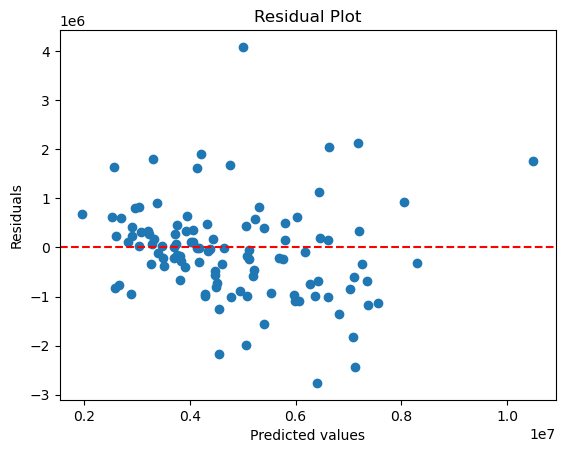

In [19]:
# Plot residuals vs predicted values
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

- residual plot indicates that errors have constant variance

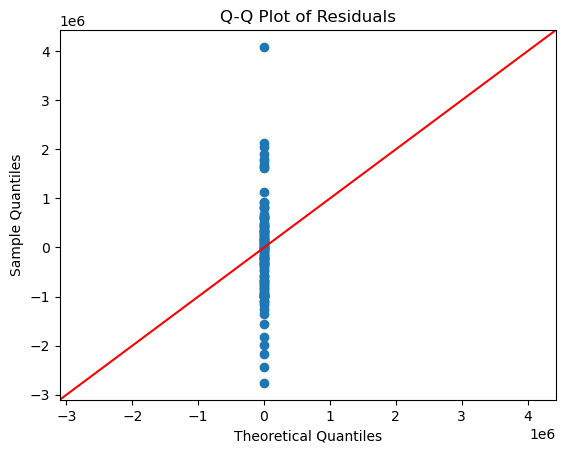

In [23]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

#### Residuals do not follows normal distribution

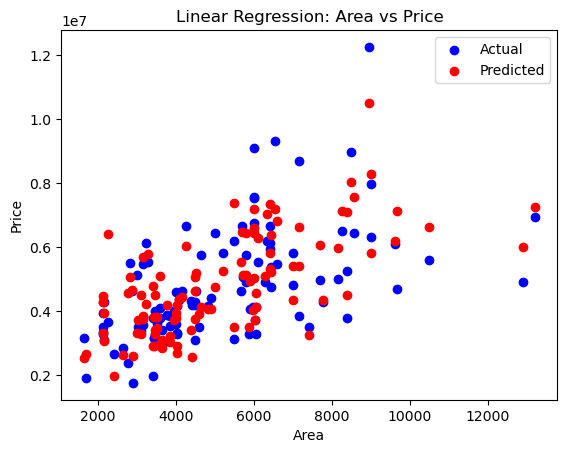

In [15]:
import matplotlib.pyplot as plt

# Example with 'area' as the single predictor
plt.scatter(X_test['area'], Y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], model.predict(X_test), color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()


In [16]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coeff_df)


                            Feature   Coefficient
0                              area  2.530924e+02
1                          bedrooms  1.220979e+05
2                         bathrooms  9.969737e+05
3                           stories  4.334898e+05
4                          mainroad  4.410267e+05
5                         guestroom  4.028487e+05
6                          basement  3.247477e+05
7                   hotwaterheating  1.210834e+06
8                   airconditioning  8.713779e+05
9                           parking  2.167987e+05
10                         prefarea  6.931444e+05
11       furnishingstatus_furnished  1.994807e+05
12  furnishingstatus_semi-furnished  9.282081e+04
13     furnishingstatus_unfurnished -2.923015e+05
